### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Daily_Coinwise_Senti_score(2016to2021).csv")
application_df

,Unnamed: 0,Dt_Rev_time,Coin_Symbol,Polarity
0,0,2016-07-11,BUSD,0.331579
1,1,2016-07-11,DOGE,0.331579
2,2,2016-07-11,XLM,0.331579
3,3,2016-07-23,BUSD,0.285714
4,4,2016-07-23,DOGE,0.285714
...,...,...,...,...
12899,12899,2021-07-06,ETH,0.064185
12900,12900,2021-07-06,LTC,0.136327
12901,12901,2021-07-06,USDT,0.081108
12902,12902,2021-07-06,XLM,0.095572


In [ ]:
application_df

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME"], inplace=True, axis=1)


In [4]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
type(application_type_counts)

pandas.core.series.Series

<AxesSubplot:ylabel='Density'>

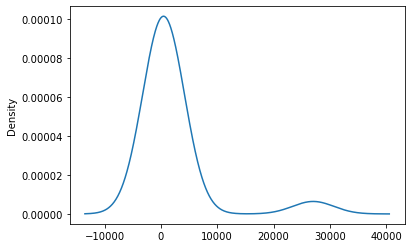

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 550].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

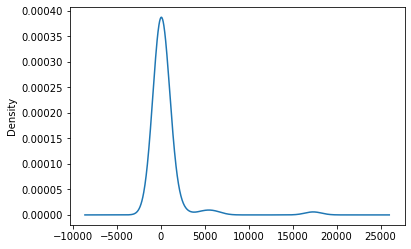

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\lavin\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\lavin\AppData\Local\Temp/ipykernel_33304/2023052568.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
print(X.shape)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

(34299, 42)


C:\Users\lavin\AppData\Local\Temp/ipykernel_33304/2905670333.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [17]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
print(X_train_scaled.shape)

(25724, 42)


In [20]:
print(len(X_train_scaled[0]))

42


### Deliverable 2: Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2752      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5339 - accuracy: 0.7419
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7422
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.7414
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.7416
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7425
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7422
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7422
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5331 - accuracy: 0.7418
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7421
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5338 - accura

## Create a call back to save the model

In [35]:
# Create a callback that saves the model's weights every 5 epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [36]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [37]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
steps_per_execution=5
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=steps_per_execution)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5330 - accuracy: 0.7422
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7428
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7418
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7427
Epoch 5/100
777/804 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7415
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5319 - accuracy: 0.7420
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7427
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7419
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7420
Epoch 9/100
804/804 [=============================

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5718 - accuracy: 0.7265 - 298ms/epoch - 1ms/step
Loss: 0.5717560648918152, Accuracy: 0.7265306115150452


# Saving after training

In [28]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 64
hidden_nodes_layer2 = 32

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5625 - accuracy: 0.7264 - 461ms/epoch - 2ms/step
Loss: 0.5625110268592834, Accuracy: 0.7264139652252197


In [29]:
# Save and export your results to an HDF5 file, and name it AlphabetSoupCharity.h5.
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity.h5")

In [30]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('AlphabetSoupCharity.h5')

In [31]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5625 - accuracy: 0.7264 - 456ms/epoch - 2ms/step
Loss: 0.5625110268592834, Accuracy: 0.7264139652252197


# Additional methods used for Summary

# Fitting the Decision Tree Model

In [41]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [42]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [43]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [44]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [45]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2704,1299
Actual 1,1212,3360


Accuracy Score : 0.7071720116618075
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      4003
           1       0.72      0.73      0.73      4572

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



# Random Forest Model

In [47]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78) 

In [48]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [49]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [50]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,2670,1333
Actual 1,1165,3407


In [51]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [52]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2670,1333
Actual 1,1165,3407


Accuracy Score : 0.7086880466472303
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.67      0.68      4003
           1       0.72      0.75      0.73      4572

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575

